In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [6]:
import pandas as pd
data = pd.read_csv('unmatch_shops.csv')

In [7]:
data = data.groupby('shop_index').sum()
data.describe()

,Unnamed: 0,decorated_indicator,manage_shop_indicator,officialstore_indicator,preferred_shop_indicator,crossborder_indicator,shop_category,new_seller_flag,seller_centre_login_L30D,shop_sku_number,shop_follower_number,shop_L180D_order,weighted_shop_rating,performance_date,masked_item_impression,masked_order,masked_shop_page_view,masked_shop_click_from_search,masked_campaign_tab_click,masked_other_tab_click
count,7.980000e+03,7980.0,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7.980000e+03,7.980000e+03,7.980000e+03,7980.000000,7980.0,7.980000e+03,7.980000e+03,7980.000000,7.980000e+03,7980.0,7980.000000
mean,2.544294e+06,0.0,0.159649,0.019298,0.291228,2.331579,111.375439,2.412281,111.950877,5.733361e+04,3.901551e+04,4.751622e+04,59.711852,105.0,5.917396e+09,1.464608e+07,1015.078697,1.325045e+03,154.0,935.678321
std,1.461768e+06,0.0,1.486565,0.519458,1.998219,5.216249,93.987426,5.287375,120.911936,8.547534e+04,2.028701e+05,3.848751e+05,8.090014,0.0,1.907460e+11,8.282347e+08,8139.463510,2.805431e+04,0.0,4267.602120
min,9.100000e+01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3.458000e+03,1.360800e+04,5.670000e+03,0.000000,105.0,0.000000e+00,0.000000e+00,0.000000,1.400000e+01,154.0,218.578947
25%,1.293992e+06,0.0,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,14.000000,1.547000e+04,1.360800e+04,5.670000e+03,56.000000,105.0,1.484532e+05,0.000000e+00,0.000000,3.598684e+01,154.0,297.171053
50%,2.551241e+06,0.0,0.000000,0.000000,0.000000,0.000000,98.000000,0.000000,56.000000,3.333400e+04,1.390200e+04,5.670000e+03,58.263158,105.0,4.231453e+06,1.000000e+00,0.000000,1.174474e+02,154.0,406.736842
75%,3.798158e+06,0.0,0.000000,0.000000,0.000000,0.000000,182.000000,0.000000,154.000000,7.583800e+04,1.886850e+04,2.514400e+04,66.052632,105.0,3.913578e+07,9.900000e+01,4.000000,4.033947e+02,154.0,647.000000
max,5.099185e+06,0.0,14.000000,14.000000,14.000000,14.000000,280.000000,14.000000,420.000000,1.516046e+06,1.102139e+07,2.371736e+07,70.000000,105.0,1.277923e+13,7.038493e+10,423806.000000,2.054703e+06,154.0,224244.000000


In [8]:
#prediction on unmatched data with features selected
data.head()
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import numpy as np
model1=linear_model.LinearRegression()
features = ['shop_L180D_order','masked_item_impression','masked_other_tab_click','shop_follower_number']


X = data[features]
y = data['masked_order']
# print(X.shape,y.shape)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f847133d748>,
      dtype=object)

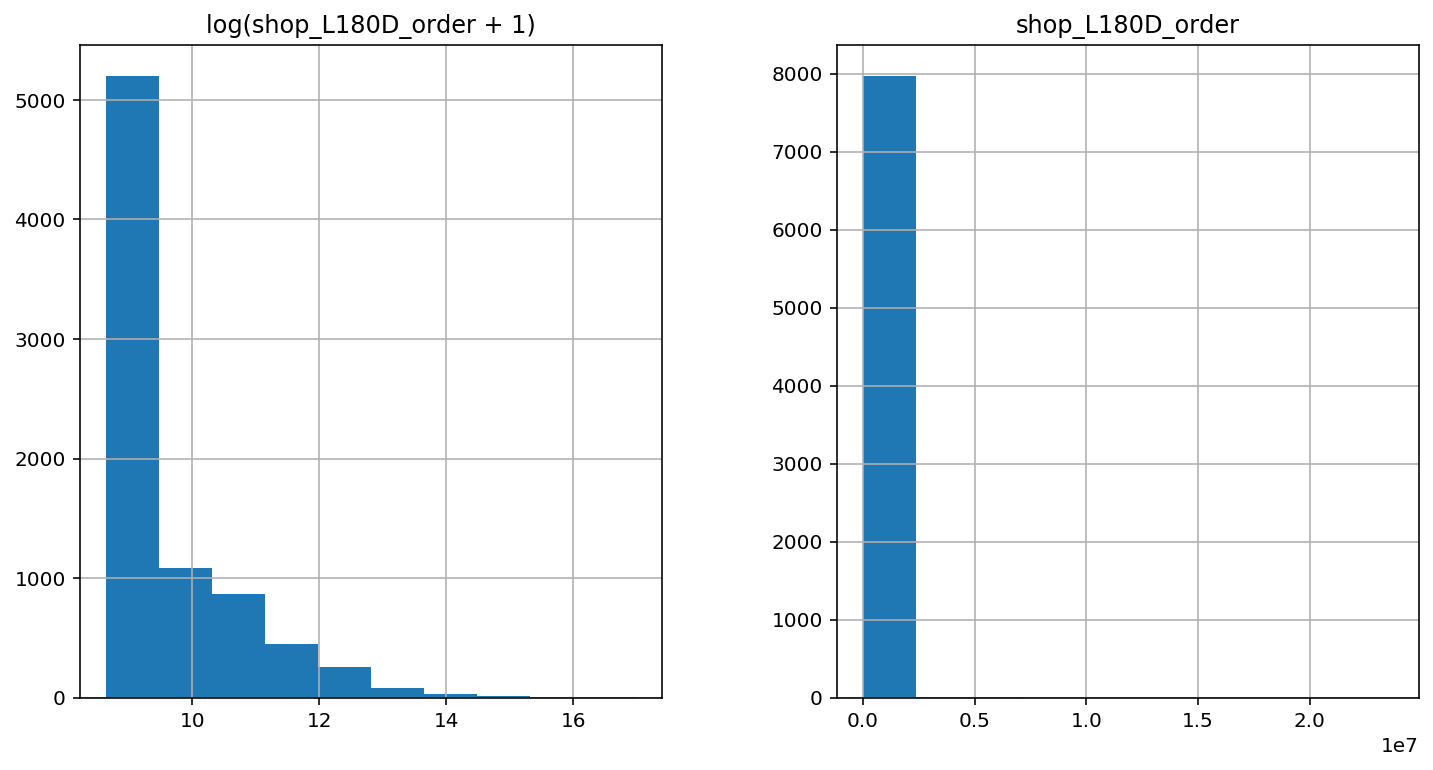

In [9]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
shop_L180D_order = pd.DataFrame({"shop_L180D_order":X["shop_L180D_order"], "log(shop_L180D_order + 1)":np.log1p(X["shop_L180D_order"])})
shop_L180D_order.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84714e2a58>,
      dtype=object)

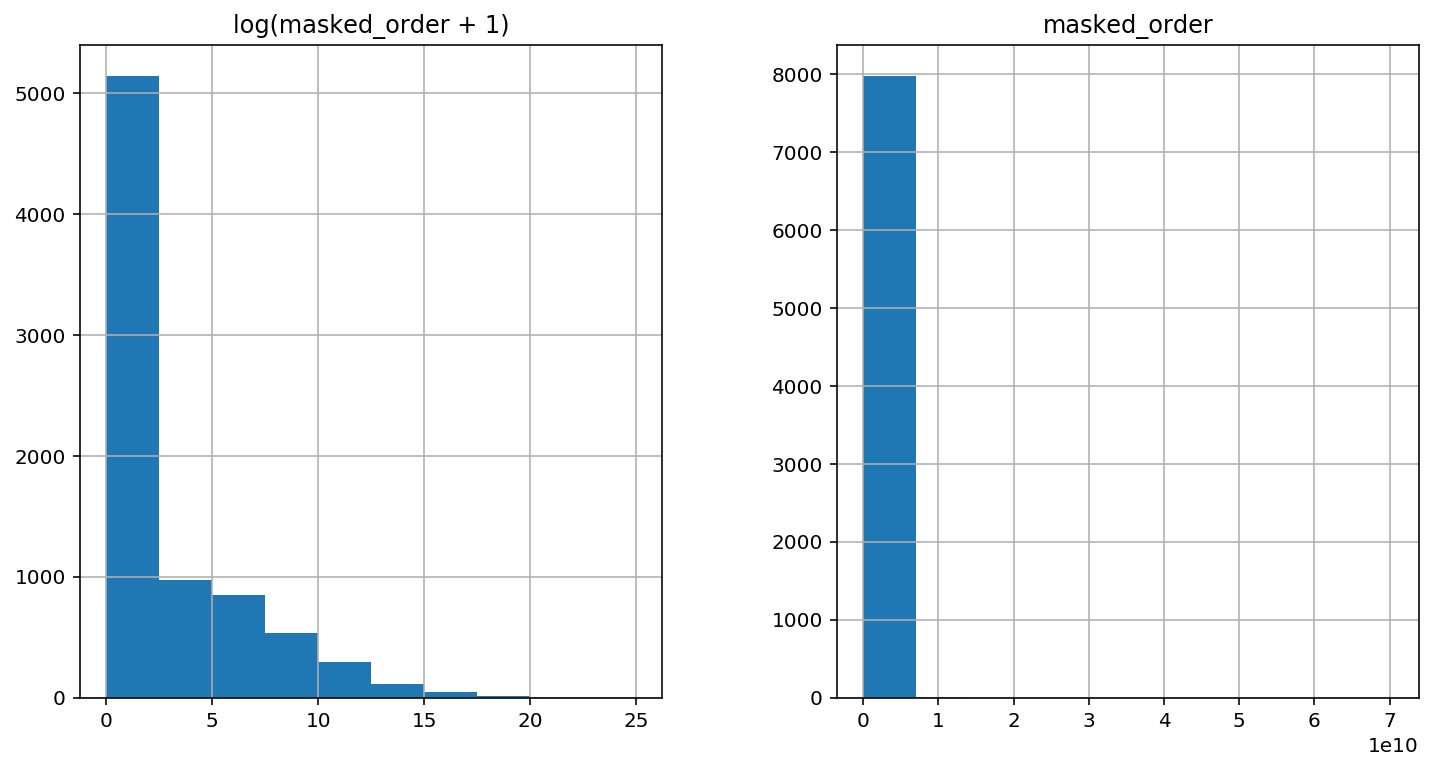

In [10]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
masked_order = pd.DataFrame({"masked_order":y, "log(masked_order + 1)":np.log1p(y)})
masked_order.hist()

In [11]:
#log transform the target:
y = np.log1p(y)

#log transform skewed numeric features:
numeric_feats = X.dtypes[X.dtypes != "object"].index

skewed_feats = X[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

X[skewed_feats] = np.log1p(X[skewed_feats])

/Users/kuroba/school/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [12]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn import metrics
my_model = RandomForestRegressor()
my_model.fit(X_train,y_train)

predicted_prices = my_model.predict(X_test)
print(predicted_prices)
print("MSE for Random Forest Regressor:",metrics.mean_squared_log_error(predicted_prices, y_test))
# print(metrics.mean_squared_log_error(predicted_prices, y_test))

[13.99517952  0.60684256  0.16094379 ...  0.          0.20794415
  3.06814987]
MSE for Random Forest Regressor: 0.22578708311640755


/Users/kuroba/school/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, predicted_prices)

0.8148339014411452

## XGB

In [15]:
from xgboost import XGBRegressor

In [16]:
#import xgboost model
xgb_model = XGBRegressor()

In [18]:
#fit model and predict
xgb_model.fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)

In [23]:
#calculate rmse
from sklearn.metrics import mean_squared_error as MSE

rmse = np.sqrt(MSE(y_test, xgb_pred))
print(rmse)

1.5900560913231574


In [25]:
#r2 score calculatioin
r2_score(y_test, xgb_pred)

0.8195498438829059

<h1> MLR </h1>

In [76]:
all_var = ['shop_L180D_order','masked_item_impression','masked_other_tab_click','shop_follower_number','masked_order']
all_data = data[all_var]

In [77]:
#log transform the target:
all_data['masked_order'] = np.log1p(all_data['masked_order'])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

/Users/miya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/miya/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [78]:
#MLR
from sklearn import model_selection
import pandas as pd
import numpy as np
import statsmodels.api as sm

# features = ['shop_L180D_order','masked_item_impression','masked_other_tab_click','shop_follower_number']

model=sm.formula.ols('masked_order~shop_L180D_order+masked_item_impression+masked_other_tab_click+shop_follower_number',data=all_data).fit()
print('模型的偏回归系数分别为：',model.params)

模型的偏回归系数分别为： Intercept                -3.971648
shop_L180D_order          0.444399
masked_item_impression    0.057889
masked_other_tab_click    0.226693
shop_follower_number     -0.159477
dtype: float64


In [79]:
test_x = all_data.drop('masked_order',axis=1)
pred = model.predict(exog = test_x)
pd.DataFrame({'Prediction':pred,'Actual':test.masked_order})

,Prediction,Actual
shop_index,,
119700,2.453774,NaN
215775,2.571251,100175.0
406305,1.875591,NaN
505260,0.986274,NaN
1004355,1.890933,NaN
1687635,2.633525,17892.0
1881135,1.295655,28.0
2515815,2.612621,NaN
2678715,1.671623,1028.0


In [80]:
#模型的F检验
import numpy as np

#计算建模数据中的因变量的均值
ybar=train.masked_order.mean()

#统计变量个数和观测个数
p=model.df_model
n=train.shape[0]

#计算回归离差平方和
RSS=np.sum((model.fittedvalues-ybar)**2)

#计算误差平方和
ESS=np.sum(model.resid**2)

#计算F统计量的值
F=(RSS/p)/(ESS/(n-p-1))

print('F统计量的值：',F)
#对比结果

from scipy.stats import f

#计算F分布的理论值
F_Theory=f.ppf(q=0.95,dfn=p,dfd=n-p-1)
print('F分布的理论值为：',F_Theory)

#model summary
model.summary()


F统计量的值： 2.763401399975348e+17
F分布的理论值为： 2.3733248122893413


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           masked_order   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     4323.
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:46:52   Log-Likelihood:                -6056.9
No. Observations:                7980   AIC:                         1.212e+04
Df Residuals:                    7975   BIC:                         1.216e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.9716      0.082    -48.312      0.000      -4.133      -3.810
shop_L180D_order           0.4444      0.008     56.506      0.000       0.429       0.460
masked_item_impression     0.0579      0.001     47.906      0.000       0.056       0.060
masked_other_tab_click     0.2267      0.011     21.291      0.000       0.206       0.248
shop_follower_number      -0.1595      0.014    -11.764      0.000      -0.186      -0.133
==============================================================================
Omnibus:                      149.605   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.507
Skew:                           0.305   Prob(JB):                     1.15e-36
Kurtosis:                       3.354   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model = model1.fit(X_train,y_train)
print(model.intercept_, model.coef_)
scores = - cross_val_score(model1, X_train,y_train , cv=5, scoring='neg_mean_squared_error')
print(np.mean(scores))

-4670839.181622916 [ 3.59120785e+02  5.63487847e-04  4.05618817e+03 -3.27481467e+02]
1.7663437861816112e+16


In [24]:
from sklearn import model_selection
def Stacking(model,train,y,test,n_fold):
    folds=model_selection.StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.empty((test.shape[0],1),float)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
        test_pred=np.append(test_pred,model.predict(test))
    return test_pred.reshape(-1,1),train_pred

In [58]:
test_pred1 ,train_pred1 = Stacking(model=model1,n_fold=10, train=X_train,test=X_test,y=y_train)

#train_pred1=pd.DataFrame(train_pred1)
#test_pred1=pd.DataFrame(test_pred1)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [29]:
from sklearn import metrics
print("MSE for :",metrics.mean_squared_log_error(test_pred1, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [28974, 2634]